### Multiple Classification using The Different Models


#### 1. 模型选择

In [1]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# datasets and metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# model
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 可用的算法评估标准
print(metrics.get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [2]:

newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=1)
categories=['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
        'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
        'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
        'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
        'talk.politics.misc', 'talk.religion.misc']


In [3]:
def plot_confusion_matrix(Y_test, pred):
    cm = confusion_matrix(Y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, cbar= False, ax = ax);
    plt.title('Train Confusion Matrix')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.show()
    plt.figure()
    plt.show()
    print('Classification report: \n',classification_report(Y_test, pred))
    print('TN - True Negative :{}'.format(cm[0,0]))
    print('FP - False Positive :{}'.format(cm[0,1]))
    print('FN - False Negative :{}'.format(cm[1,0]))
    print('TP - True Positive :{}'.format(cm[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.
    sum(cm))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1
    ,0]]),np.sum(cm))))
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Precision = TP/(TP+FP)
    Fscore = 2*TP/(2*TP+FP+FN)

    print('True Negative Rate:', TNR)
    print('True Positive Rate:', TPR)
    print('Precision:', Precision)
    print('F-score:', Fscore)

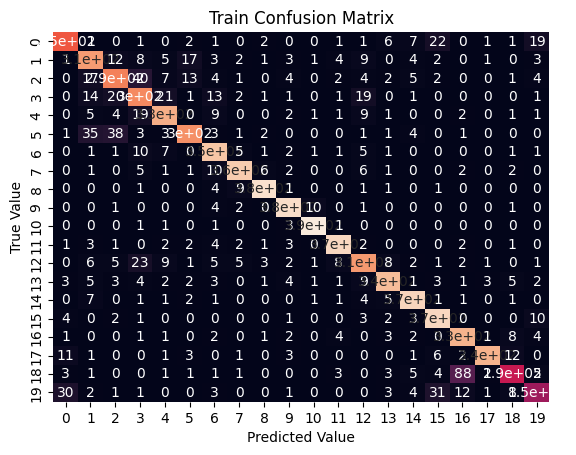

<Figure size 640x480 with 0 Axes>

Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       319
           1       0.76      0.80      0.78       389
           2       0.77      0.73      0.75       394
           3       0.71      0.76      0.74       392
           4       0.84      0.86      0.85       385
           5       0.87      0.76      0.81       395
           6       0.83      0.91      0.87       390
           7       0.92      0.91      0.91       396
           8       0.95      0.95      0.95       398
           9       0.92      0.95      0.93       397
          10       0.96      0.98      0.97       399
          11       0.93      0.94      0.93       396
          12       0.81      0.79      0.80       393
          13       0.90      0.87      0.88       396
          14       0.90      0.93      0.92       394
          15       0.84      0.93      0.88       398
          16       0.75      0.92      0.82       364
  

In [4]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LinearSVC()),
                    ])

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)

plot_confusion_matrix(y_test, predicted)

In [10]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LinearSVC()),
                    ])

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print("SVM 5-Cross Validation Score:",cross_val_score(text_clf, X_train, y_train, cv=5, scoring='accuracy').mean())
print("SVM 5-Cross Validation Score:",cross_val_score(text_clf, X_train, y_train, cv=5, scoring='precision_macro').mean())
print("SVM 5-Cross Validation Score:",cross_val_score(text_clf, X_train, y_train, cv=5, scoring='f1_macro').mean())


SVM 5-Cross Validation Score: 0.9254025371827496
SVM 5-Cross Validation Score: 0.9266280476486827
SVM 5-Cross Validation Score: 0.9246314548794947


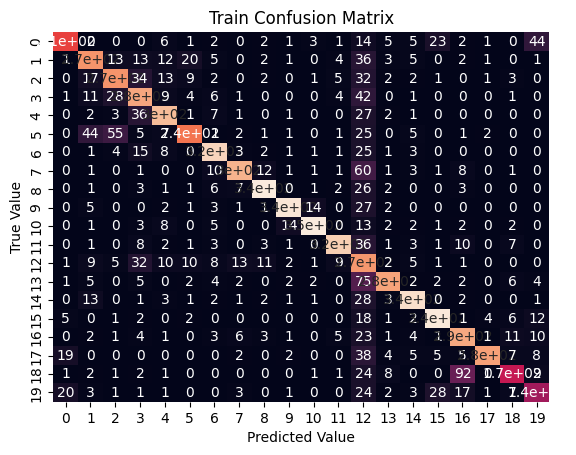

<Figure size 640x480 with 0 Axes>

Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.66      0.72       319
           1       0.70      0.69      0.69       389
           2       0.71      0.69      0.70       394
           3       0.63      0.72      0.68       392
           4       0.78      0.79      0.79       385
           5       0.82      0.62      0.71       395
           6       0.83      0.83      0.83       390
           7       0.88      0.74      0.80       396
           8       0.89      0.87      0.88       398
           9       0.92      0.86      0.89       397
          10       0.93      0.87      0.90       399
          11       0.90      0.81      0.85       396
          12       0.32      0.69      0.43       393
          13       0.87      0.71      0.78       396
          14       0.87      0.85      0.86       394
          15       0.84      0.86      0.85       398
          16       0.66      0.79      0.72       364
  

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', GradientBoostingClassifier(n_estimators=100)),
                    ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)
plot_confusion_matrix(y_test, predicted)
print(metrics.classification_report(y_test, predicted))

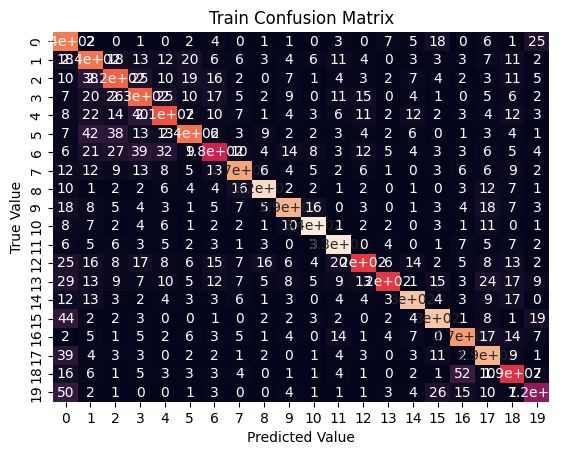

<Figure size 640x480 with 0 Axes>

Classification report: 
               precision    recall  f1-score   support

           0       0.43      0.76      0.55       319
           1       0.50      0.61      0.55       389
           2       0.56      0.57      0.57       394
           3       0.53      0.58      0.56       392
           4       0.59      0.56      0.57       385
           5       0.69      0.60      0.64       395
           6       0.58      0.45      0.51       390
           7       0.75      0.69      0.72       396
           8       0.84      0.81      0.82       398
           9       0.77      0.72      0.74       397
          10       0.85      0.84      0.84       399
          11       0.76      0.84      0.80       396
          12       0.70      0.50      0.58       393
          13       0.82      0.49      0.62       396
          14       0.79      0.76      0.78       394
          15       0.75      0.76      0.76       398
          16       0.70      0.73      0.72       364
  

In [5]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', KNeighborsClassifier()),
                    ])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)
plot_confusion_matrix(y_test, predicted)
print(metrics.classification_report(y_test, predicted))

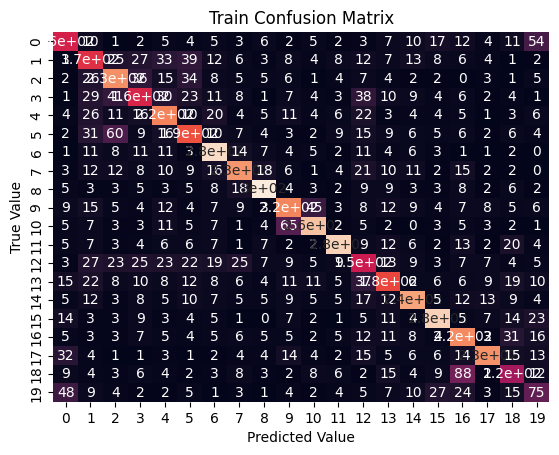

<Figure size 640x480 with 0 Axes>

Classification report: 
               precision    recall  f1-score   support

           0       0.48      0.49      0.48       319
           1       0.39      0.43      0.41       389
           2       0.51      0.58      0.54       394
           3       0.45      0.41      0.43       392
           4       0.52      0.57      0.54       385
           5       0.48      0.48      0.48       395
           6       0.64      0.73      0.68       390
           7       0.64      0.59      0.61       396
           8       0.76      0.75      0.75       398
           9       0.55      0.56      0.56       397
          10       0.70      0.66      0.68       399
          11       0.77      0.70      0.74       396
          12       0.37      0.38      0.37       393
          13       0.53      0.46      0.49       396
          14       0.66      0.62      0.64       394
          15       0.70      0.70      0.70       398
          16       0.48      0.62      0.54       364
  

In [24]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', tree.DecisionTreeClassifier()),
                    ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)
plot_confusion_matrix(y_test, predicted)
print(metrics.classification_report(y_test, predicted))

In [6]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', tree.DecisionTreeClassifier()),
                    ])

print("Decision Tree 5-Cross Validation Score:",cross_val_score(text_clf, X_train, y_train, cv=5, scoring='accuracy').mean())
print("Decision Tree 5-Cross Validation Score:",cross_val_score(text_clf, X_train, y_train, cv=5, scoring='precision_macro').mean())
print("Decision Tree 5-Cross Validation Score:",cross_val_score(text_clf, X_train, y_train, cv=5, scoring='f1_macro').mean())

Decision Tree 5-Cross Validation Score: 0.6300164918050849
Decision Tree 5-Cross Validation Score: 0.6299814618892137
Decision Tree 5-Cross Validation Score: 0.6250999801826017


结论:
(1) svm 算法 accracy 精确度高，计算性能最好
(2) Cross Validation 能有效提高算法的 accracy